# Advanced Python Meta Programming and Beyond

## What will we learn in this class?

* Decorators
* Context Managers
* Factories
* Big Dat with Dask

## Decorators
Functions and methods are called callable as they can be called.

In fact, any object which implements the special __call__() method is termed callable. So, in the most basic sense, a decorator is a callable that returns a callable.

Basically, a decorator takes in a function, adds some functionality and returns it.


source:

In [1]:
def make_pretty(func):
    def inner():
        print("I got decorated")
        func()
    return inner


def ordinary():
    print("I am ordinary")

In [2]:
ordinary()


I am ordinary


In [3]:
pretty = make_pretty(ordinary)

In [4]:
pretty()

I got decorated
I am ordinary


We can use the @ symbol along with the name of the decorator function and place it above the definition of the function to be decorated. For example,

In [6]:
@make_pretty
def ordinary():
    print("I am ordinary")
ordinary()

I got decorated
I am ordinary


## Decorating Functions with Parameters
The above decorator was simple and it only worked with functions that did not have any parameters. What if we had functions that took in parameters like:

In [7]:
def divide(a, b):
    return a/b

In [8]:
def smart_divide(func):
    def inner(a, b):
        print("I am going to divide", a, "and", b)
        if b == 0:
            print("Whoops! cannot divide")
            return

        return func(a, b)
    return inner


@smart_divide
def divide(a, b):
    print(a/b)
    
divide(2,0)

I am going to divide 2 and 0
Whoops! cannot divide


Lets see a more practical example of usage of decorators. In this example we will see how we can clean and improve the readibility of our code using decorators and logging function
    
    

In [10]:
import logging
def create_logger():
    """
    Creates a logging object and returns it
    """
    logger = logging.getLogger("example_logger")
    logger.setLevel(logging.INFO)
    # create the logging file handler
    fh = logging.FileHandler(r"test.log")
    fmt = '%(asctime)s - %(name)s - %(levelname)s - %(message)s'
    formatter = logging.Formatter(fmt)
    fh.setFormatter(formatter)
    # add handler to logger object
    logger.addHandler(fh)
    return logger
logger = create_logger()

In [11]:
import functools
def exception(logger):
    """
    A decorator that wraps the passed in function and logs 
    exceptions should one occur
    
    @param logger: The logging object
    """
    
    def decorator(func):
    
        def wrapper(*args, **kwargs):
            try:
                return func(*args, **kwargs)
            except:
                # log the exception
                err = "There was an exception in  "
                err += func.__name__
                logger.exception(err)
            
            # re-raise the exception
            raise
        return wrapper
    return decorator

In [13]:

@exception(logger)
def divide(a, b):
    print(a/b)
    
divide(5,4)

1.25


In [15]:
divide(3,0)

RuntimeError: No active exception to reraise

## Context Managers

Of all of the most commonly used Python constructs, context managers are neck-and-neck with decorators in a "Things I use but don't really understand how they work" contest. As every schoolchild will tell you, the canonical way to open and read from a file is:

```
with open('what_are_context_managers.txt', 'r') as infile:
    for line in infile:
        print('> {}'.format(line))

```

But how many of those who correctly handle file IO know why it's correct, or even that there's an incorrect way to do it

Managing Resources

Perhaps the most common (and important) use of context managers is to properly manage resources. In fact, that's the reason we use a context manager when reading from a file. To understand context managers lets explore the with protocol

The with statement is a control-flow structure that allows us to encapsulate` try...except...finall`y blocks for convenient reuse

The with statement supports a runtime context which is implemented through a pair of methods executed (1) before the statement body is entered (__enter__()) and (2) after the statement body is exited (__exit__())

The context-expression requires an object that supports the context manager protocol, i.e. a class containing __enter__() and __exit__() methods. We can also point to a context manager written using generators and the contextmanager decorator.

for a from scratch implementation of a context manager you can look here: 
https://alysivji.github.io/managing-resources-with-context-managers-pythonic.html

lets look at the contextlib library

In [117]:
from contextlib import contextmanager

@contextmanager
def session_scope():
    """Provide a transactional scope around a series of operations."""
    session = Session()
    try:
        yield session
        session.commit()
    except:
        session.rollback()
        raise
    finally:
        session.close()


def run_my_program():
    with session_scope() as session:
        ThingOne().go(session)
        ThingTwo().go(session)

## Iterators

Alexander Stepanov thought for years about the problem of generic programming techniques before creating the STL (along with Dave Musser). He came to the conclusion that all algorithms are defined on algebraic structures - what we would call containers.

In the process, he realized that iterators are central to the use of algorithms, because they decouple the algorithms from the specific type of container that the algorithm might currently be working with. This means that you can describe the algorithm without worrying about the particular sequence it is operating on. More generally, any code that you write using iterators is decoupled from the data structure that the code is manipulating, and thus your code is more general and reusable.

The use of iterators also extends your code into the realm of functional programming, whose objective is to describe what a program is doing at every step rather than how it is doing it. That is, you say “sort” rather than describing the sort. The objective of the C++ STL was to provide this generic programming approach for C++ (how successful this approach will actually be remains to be seen)

### Create an Iterator

To create an object/class as an iterator you have to implement the methods __iter__() and __next__() to your object.

As you have learned in the Python Classes/Objects chapter, all classes have a function called __init__(), which allows you to do some initializing when the object is being created.

The __iter__() method acts similar, you can do operations (initializing etc.), but must always return the iterator object itself.

The __next__() method also allows you to do operations, and must return the next item in the sequence.

In [118]:
class MyNumbers:
  def __iter__(self):
    self.a = 1
    return self

  def __next__(self):
    if self.a <= 20:
      x = self.a
      self.a += 1
      return x
    else:
      raise StopIteration

myclass = MyNumbers()
myiter = iter(myclass)

for x in myiter:
  print(x)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20


In [119]:
myiter[0]

TypeError: 'MyNumbers' object is not subscriptable

## Factory: Encapsulating Object Creation## Factory Method


In [17]:
# Whats the issue with this code

# Python Code for Object 
# Oriented Concepts without 
# using Factory method  
  
class FrenchLocalizer: 
  
    """ it simply returns the french version """
  
    def __init__(self): 
  
        self.translations = {"car": "voiture", "bike": "bicyclette", 
                             "cycle":"cyclette"} 
  
    def localize(self, message): 
  
        """change the message using translations"""
        return self.translations.get(msg, msg) 
  
class SpanishLocalizer: 
    """it simply returns the spanish version"""
  
    def __init__(self): 
  
        self.translations = {"car": "coche", "bike": "bicicleta", 
                             "cycle":"ciclo"} 
  
    def localize(self, msg): 
  
        """change the message using translations"""
        return self.translations.get(msg, msg) 
  
class EnglishLocalizer: 
    """Simply return the same message"""
  
    def localize(self, msg): 
        return msg 
  
if __name__ == "__main__": 
  
    # main method to call others 
    f = FrenchLocalizer() 
    e = EnglishLocalizer() 
    s = SpanishLocalizer() 
  
    # list of strings 
    message = ["car", "bike", "cycle"] 
  
    for msg in message: 
        print(f.localize(msg)) 
        print(e.localize(msg)) 
        print(s.localize(msg)) 


voiture
car
coche
bicyclette
bike
bicicleta
cyclette
cycle
ciclo


In [19]:
#why is this one better
  
class FrenchLocalizer: 
  
    """ it simply returns the french version """
  
    def __init__(self): 
  
        self.translations = {"car": "voiture", "bike": "bicyclette", 
                             "cycle":"cyclette"} 
  
    def localize(self, message): 
  
        """change the message using translations"""
        return self.translations.get(msg, msg) 
  
class SpanishLocalizer: 
    """it simply returns the spanish version"""
  
    def __init__(self): 
        self.translations = {"car": "coche", "bike": "bicicleta", 
                             "cycle":"ciclo"} 
  
    def localize(self, msg): 
  
        """change the message using translations"""
        return self.translations.get(msg, msg) 
  
class EnglishLocalizer: 
    """Simply return the same message"""
  
    def localize(self, msg): 
        return msg 
  
def Factory(language ="English"): 
  
    """Factory Method"""
    localizers = { 
        "French": FrenchLocalizer, 
        "English": EnglishLocalizer, 
        "Spanish": SpanishLocalizer, 
    } 
  
    return localizers[language]() 
  
if __name__ == "__main__": 
  
    f = Factory("French") 
    e = Factory("English") 
    s = Factory("Spanish") 
  
    message = ["car", "bike", "cycle"] 
  
    for msg in message: 
        print(f.localize(msg)) 
        print(e.localize(msg)) 
        
        print(s.localize(msg)) 

voiture
car
coche
bicyclette
bike
bicicleta
cyclette
cycle
ciclo


factory Method is a Creational Design Pattern that allows an interface or a class to create an object, but let subclasses decide which class or object to instantiate. Using the Factory method, we have the best ways to create an object. Here, objects are created without exposing the logic to the client and for creating the new type of the object, the client uses the same common interface.


## Simple Factory Method



In [112]:
# Factory/shapefact1/ShapeFactory1.py
# A simple static factory method.
from __future__ import generators
import random

class Shape(object):
    # Create based on class name:
    def factory(type):
        #return eval(type + "()")
        if type == "Circle": return Circle()
        if type == "Square": return Square()
        assert 0, "Bad shape creation: " + type
    factory = staticmethod(factory)

class Circle(Shape):
    def draw(self): print("Circle.draw")
    def erase(self): print("Circle.erase")

class Square(Shape):
    def draw(self): print("Square.draw")
    def erase(self): print("Square.erase")

# Generate shape name strings:
def shapeNameGen(n):
    types = Shape.__subclasses__()
    for i in range(n):
        yield random.choice(types).__name__

shapes = \
  [ Shape.factory(i) for i in shapeNameGen(7)]

for shape in shapes:
    shape.draw()
    shape.erase()

Circle.draw
Circle.erase
Circle.draw
Circle.erase
Square.draw
Square.erase
Square.draw
Square.erase
Circle.draw
Circle.erase
Square.draw
Square.erase
Square.draw
Square.erase


The factory( ) takes an argument that allows it to determine what type of Shape to create; it happens to be a String in this case but it could be any set of data. The factory( ) is now the only other code in the system that needs to be changed when a new type of Shape is added (the initialization data for the objects will presumably come from somewhere outside the system, and not be a hard-coded array as in the above example).

Note that this example also shows the new Python 2.2 staticmethod( ) technique for creating static methods in a class.

## Preventing direct creation

To disallow direct access to the classes, you can nest the classes within the factory method, like this:

In [116]:
# Factory/shapefact1/NestedShapeFactory.py
import random

class Shape(object):
    types = []

def factory(type):
    class Circle(Shape):
        def draw(self): print("Circle.draw")
        def erase(self): print("Circle.erase")

    class Square(Shape):
        def draw(self): print("Square.draw")
        def erase(self): print("Square.erase")

    if type == "Circle": return Circle()
    if type == "Square": return Square()
    assert 0, "Bad shape creation: " + type

def shapeNameGen(n):
    for i in range(n):
        yield factory(random.choice(["Circle", "Square"]))

# Circle() # Not defined

for shape in shapeNameGen(7):
    shape.draw()
    shape.erase()

Circle.draw
Circle.erase
Square.draw
Square.erase
Square.draw
Square.erase
Circle.draw
Circle.erase
Circle.draw
Circle.erase
Square.draw
Square.erase
Circle.draw
Circle.erase


## Abstract Factories

the Abstract Factory pattern looks like the factory objects we’ve seen previously, with not one but several factory methods. Each of the factory methods creates a different kind of object. The idea is that at the point of creation of the factory object, you decide how all the objects created by that factory will be used. The example given in Design Patterns implements portability across various graphical user interfaces (GUIs): you create a factory object appropriate to the GUI that you’re working with, and from then on when you ask it for a menu, button, slider, etc. it will automatically create the appropriate version of that item for the GUI. Thus you’re able to isolate, in one place, the effect of changing from one GUI to another.

As another example suppose you are creating a general-purpose gaming environment and you want to be able to support different types of games. Here’s how it might look using an abstract factory:

In [115]:

class Obstacle:
    def action(self): pass

class Character:
    def interactWith(self, obstacle): pass

class Kitty(Character):
    def interactWith(self, obstacle):
        print("Kitty has encountered a",
        obstacle.action())

class KungFuGuy(Character):
    def interactWith(self, obstacle):
        print("KungFuGuy now battles a",
        obstacle.action())

class Puzzle(Obstacle):
    def action(self):
        print("Puzzle")

class NastyWeapon(Obstacle):
    def action(self):
        print("NastyWeapon")

# The Abstract Factory:
class GameElementFactory:
    def makeCharacter(self): pass
    def makeObstacle(self): pass

# Concrete factories:
class KittiesAndPuzzles(GameElementFactory):
    def makeCharacter(self): return Kitty()
    def makeObstacle(self): return Puzzle()

class KillAndDismember(GameElementFactory):
    def makeCharacter(self): return KungFuGuy()
    def makeObstacle(self): return NastyWeapon()

class GameEnvironment:
    def __init__(self, factory):
        self.factory = factory
        self.p = factory.makeCharacter()
        self.ob = factory.makeObstacle()
    def play(self):
        self.p.interactWith(self.ob)

g1 = GameEnvironment(KittiesAndPuzzles())
g2 = GameEnvironment(KillAndDismember())
g1.play()
g2.play()



Puzzle
Kitty has encountered a None
NastyWeapon
KungFuGuy now battles a None


In this environment, Character objects interact with Obstacle objects, but there are different types of Characters and obstacles depending on what kind of game you’re playing. You determine the kind of game by choosing a particular GameElementFactory, and then the GameEnvironment controls the setup and play of the game. In this example, the setup and play is very simple, but those activities (the initial conditions and the state change) can determine much of the game’s outcome. Here, GameEnvironment is not designed to be inherited, although it could very possibly make sense to do that.

# Dask

Dask is an Open Source project that gives you abstractions over NumPy Arrays, Pandas Dataframes and regular lists, allowing you to run operations on them in parallel, using multicore processing.

We will use dask for:

* Manipulating large datasets, even when those datasets don’t fit in memory
* Accelerating long computations by using many cores
* Distributed computing on large datasets with standard Pandas operations like groupby, join, and time series computations

Dask provides us with :
* A Symbolic, delayed , computational graph API
* Distributed computation graph.
* High level wrappers for numpy and pandas on top of Dask graphs


sources:
https://tutorial.dask.org/00_overview.html


In [22]:
from dask.distributed import Client

client = Client(n_workers=4)
from time import sleep

def inc(x):
    sleep(1)
    return x + 1

def add(x, y):
    sleep(1)
    return x + y


In [23]:
%%time
# This takes three seconds to run because we call each
# function sequentially, one after the other

x = inc(1)
y = inc(2)
z = add(x, y)

CPU times: user 148 ms, sys: 68.5 ms, total: 216 ms
Wall time: 3 s


Those two increment calls could be called in parallel, because they are totally independent of one-another.

We’ll transform the inc and add functions using the dask.delayed function. When we call the delayed version by passing the arguments, exactly as before, but the original function isn’t actually called yet - which is why the cell execution finishes very quickly. Instead, a delayed object is made, which keeps track of the function to call and the arguments to pass to it.

In [24]:
from dask import delayed


UsageError: Line magic function `%%time` not found.


In [25]:
%%time
# This runs immediately, all it does is build a graph

x = delayed(inc)(1)
y = delayed(inc)(2)
z = delayed(add)(x, y)

CPU times: user 784 µs, sys: 319 µs, total: 1.1 ms
Wall time: 962 µs


In [26]:
%%time
# This actually runs our computation using a local thread pool

z.compute()

CPU times: user 112 ms, sys: 55.1 ms, total: 167 ms
Wall time: 2.03 s


5

In [27]:
z

Delayed('add-442b560d-b33c-44a2-94be-5b4d677b7351')

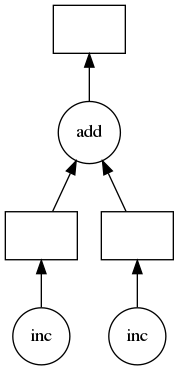

In [28]:
# Look at the task graph for `z`
z.visualize()

In [29]:
data = [1, 2, 3, 4, 5, 6, 7, 8]




UsageError: Line magic function `%%time` not found.


In [30]:
%%time
# Sequential code

results = []
for x in data:
    y = inc(x)
    results.append(y)

total = sum(results)

CPU times: user 442 ms, sys: 139 ms, total: 580 ms
Wall time: 8.01 s


In [106]:
%%time 
results = []

for x in data:
    y = delayed(inc)(x)
    results.append(y)

total = delayed(sum)(results)
print("Before computing:", total)  # Let's see what type of thing total is
result = total.compute()
print("After computing :", result)  # After it's computed

Before computing: Delayed('sum-564a0f77-24ab-488b-8764-ccb56c871566')
After computing : 44
CPU times: user 93.9 ms, sys: 10.9 ms, total: 105 ms
Wall time: 1.04 s


Exercise: Parallelizing a for-loop code with control flow

Often we want to delay only some functions, running a few of them immediately. This is especially helpful when those functions are fast and help us to determine what other slower functions we should call. This decision, to delay or not to delay, is usually where we need to be thoughtful when using dask.delayed.

In the example below we iterate through a list of inputs. If that input is even then we want to call inc. If the input is odd then we want to call double. This is_even decision to call inc or double has to be made immediately (not lazily) in order for our graph-building Python code to proceed.

In [107]:
def double(x):
    sleep(1)
    return 2 * x

def is_even(x):
    return not x % 2

data = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]



In [108]:
%%time
# Sequential code

results = []
for x in data:
    if is_even(x):
        y = double(x)
    else:
        y = inc(x)
    results.append(y)

total = sum(results)
print(total)

90
CPU times: user 679 ms, sys: 55.8 ms, total: 734 ms
Wall time: 10 s


In [109]:
results = []
for x in data:
    if is_even(x):  # even
        y = delayed(double)(x)
    else:          # odd
        y = delayed(inc)(x)
    results.append(y)

total = delayed(sum)(results)

In [110]:
%time total.compute()

CPU times: user 82.2 ms, sys: 15 ms, total: 97.3 ms
Wall time: 1.03 s


90

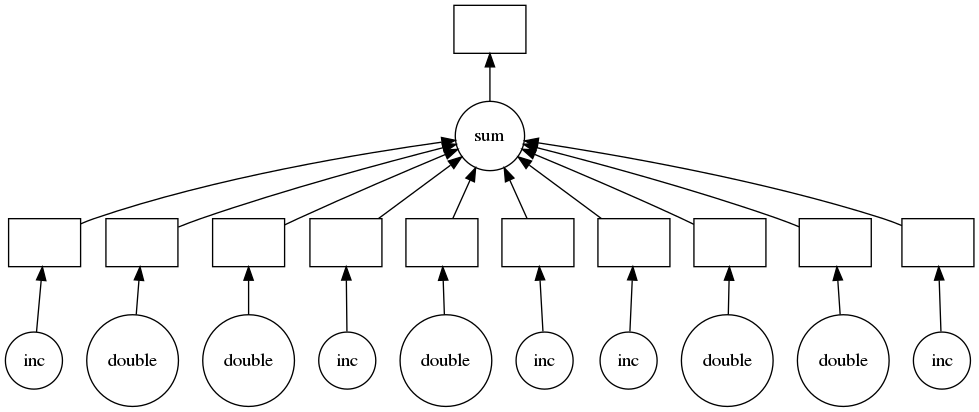

In [111]:
total.visualize()

How can we use  Dask for big data then?

<img src ="static/img/dask_pandas.png">


lets run some benchmarks

In [42]:
# lets crete a very big dataframe 
import pandas as pd
import time
import dask.dataframe as ddf
from tqdm import tqdm

In [91]:
# tmp_df=pd.DataFrame(index=range(100),columns=["open","close","volume"],data=np.random.rand(100,3))
# random_df=pd.DataFrame()
# tmp_df.to_csv("random_df.csv",mode="a")    
    
# for i in tqdm(range(1000000)):

#     tmp_df.to_csv("random_df.csv",mode="a",header=False)    
    

100%|██████████| 1000000/1000000 [15:10<00:00, 1098.63it/s]


In [57]:
def benchmark(function, function_name):
    start = time.time()
    function()
    end = time.time()
    print("{0} seconds for {1}".format((end - start), function_name))

In [92]:


df = ddf.read_csv('random_df.csv',header=0)
dfo = pd.read_csv('random_df.csv')


/home/jose/venv/p37_deep_trading/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (1,2,3) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [93]:
dfo.memory_usage(index=True).sum()*1e-9

4.000009792

In [94]:
def multipy(df):
    df['mult'] = df['Unnamed: 0']*.5
    
def test_1():
    multipy(df)
def test_2():
    multipy(dfo)

benchmark(test_1, 'dask')
benchmark(test_2, 'pandas')

0.011890411376953125 seconds for dask
0.5206854343414307 seconds for pandas


In [95]:
def get_big_mean():
    return df['Unnamed: 0'].mean().compute()
def get_big_mean_pandas():
    return dfo['Unnamed: 0'].mean()

benchmark(get_big_mean, 'dask')
benchmark(get_big_mean_pandas, 'pandas')

13.203725337982178 seconds for dask
0.6686611175537109 seconds for pandas


In [96]:
def f(x):
    return (13*x+5)%7

def apply_random_pandas():
    return  dfo['Unnamed: 0'].apply(f)
    
def apply_random():
    return df['Unnamed: 0'].apply(f, meta=('Unnamed: 0', 'float64')).compute()
    
benchmark(apply_random, 'dask')
benchmark(apply_random_pandas, 'pandas')

28.48238468170166 seconds for dask
32.527658462524414 seconds for pandas


In [105]:
# df3 = dd.concat([df for _ in range(500)])!!!

Dask Series Structure:
npartitions=1
    int64
      ...
dtype: int64
Dask Name: series-groupby-sum-agg, 1089 tasks

# Best Practices

## Persist Intelligently

Often DataFrame workloads look like the following:

    Load data from files
    Filter data to a particular subset
    Shuffle data to set an intelligent index
    Several complex queries on top of this indexed data

It is often ideal to load, filter, and shuffle data once and keep this result in memory. Afterwards, each of the several complex queries can be based off of this in-memory data rather than have to repeat the full load-filter-shuffle process each time. To do this, use the client.persist method:

```
df = dd.read_csv('s3://bucket/path/to/*.csv')
df = df[df.balance < 0]
df = client.persist(df)

df = df.set_index('timestamp')
df = client.persist(df)

```

##Avoid Full-Data Shuffling

Setting an index is an important but expensive operation (see above). You should do it infrequently and you should persist afterwards (see below).

Some operations like set_index and merge/join are harder to do in a parallel or distributed setting than if they are in-memory on a single machine. In particular, shuffling operations that rearrange data become much more communication intensive. For example, if your data is arranged by customer ID but now you want to arrange it by time, all of your partitions will have to talk to each other to exchange shards of data. This can be an intensive process, particularly on a cluster.

So, definitely set the index but try do so infrequently. After you set the index, you may want to persist your data if you are on a cluster:

```
df = df.set_index('column_name')  # do this infrequently
```
